In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
import sklearn.model_selection as ms
import sklearn.metrics as sklm

import numpy.random as nr
import matplotlib.pyplot as plt

import scipy.stats as ss
import math


%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_metrics = pd.read_csv('BiomechanicsExercise_Metrics_Limited.csv')

In [4]:
df_signals = pd.read_csv('BiomechanicsExercise_Signals_New_Limited.csv')

In [5]:
df_metrics.head()

,INNING,PITCHER_PITCH_COUNT,PITCHER_NAME_LAST_FIRST,PITCH_TYPE,RELEASE_SPEED,SPIN_RATE,PITCH_RELEASE_COORDINATES_X,PITCH_RELEASE_COORDINATES_Z,EXTENSION,HORIZONTAL_BREAK,INDUCED_VERTICAL_BREAK,ELBOW_BR_X,ELBOW_FP_X,ELBOW_MER_X,FOOTPOS_IN,FRONTKNEE_BR_X,FRONTKNEE_FP_X,PELVIS_FP_Z,SHOULDER_BR_X,SHOULDER_BR_Y,SHOULDER_BR_Z,SHOULDER_FP_X,SHOULDER_FP_Y,SHOULDER_FP_Z,STRIDELENGTH100,TRUNK_BR_X,TRUNK_BR_Y,TRUNK_BR_Z,TRUNK_FP_X,TRUNK_FP_Y,TRUNK_FP_Z
0,7,94,Player A,Curveball,80.3883,3069.98,-2.649489,5.250047,6.033803,17.356354,-8.836286,18.835064,90.492935,68.872017,-13.388475,-17.299446,-47.481251,30.069187,-3.473849,-86.997734,-103.200378,-28.247541,-82.033676,-51.595837,82.218582,-26.647268,3.785455,111.772652,-23.035557,-3.380013,-1.553947
1,7,91,Player A,Curveball,81.1436,2930.98,-2.596839,5.287482,6.284959,8.552296,-9.194957,17.543615,88.490181,75.076813,-12.834901,-20.024469,-46.932350,25.913010,-6.670791,-87.678993,-88.211510,-28.197557,-82.601646,-45.596077,83.303299,-24.946074,2.657078,112.718834,-23.366488,-5.327053,-3.388054
2,1,9,Player A,Curveball,82.7500,3023.98,-2.437611,5.331092,5.645580,15.747335,-3.150331,20.663864,91.732651,75.946587,-12.876179,-24.804361,-47.819828,27.705956,-1.979697,-88.034851,-100.691460,-28.612041,-80.389153,-53.194824,81.563690,-26.631132,2.990835,110.993118,-24.577394,-4.615892,-4.551186
3,7,106,Player A,Curveball,81.7150,2981.98,-2.556336,5.190663,6.274520,15.719063,-3.912415,22.649256,93.915176,72.198326,-13.013071,-18.581823,-48.877602,33.428982,-1.231011,-88.526917,-88.902885,-29.055071,-80.828445,-50.259247,82.888641,-25.866522,1.413054,111.582634,-23.112663,-4.216677,0.614861
4,1,1,Player A,Fastball,93.7723,2246.98,-2.497085,5.418919,6.271444,-16.894970,11.402050,22.664278,86.677200,73.977104,-9.856566,-30.171541,-50.537254,29.465229,0.008133,-88.946091,-99.955322,-25.778023,-82.060402,-49.121586,83.345558,-25.800154,3.785414,111.526321,-24.769983,-5.318536,-4.635437


In [6]:
df_signals.head()

,INNING,PITCHER_PITCH_COUNT,PITCHER_NAME_LAST_FIRST,PITCH_TYPE,FRAME,ZERO_TIME,BACKHIP_Z,BACKKNEE_X,MODEL_COG_LAB_X,MODEL_COG_LAB_Y,MODEL_COG_LAB_Z,ELBOW_X,ELBOWFORCE_X,ELBOWMOMENT_Y,FRONTKNEE_X,PELVIS_Z,SHOULDER_X,SHOULDER_Y,SHOULDER_Z,TRUNK_X,TRUNK_Y,TRUNK_Z
0,1,12,Player A,Curveball,1,0.000000,1.296931,-38.077911,-0.200580,0.220239,1.101333,99.398415,NaN,NaN,-53.363659,-13.223335,-11.942955,-11.131011,46.719975,-7.713179,-1.503174,-16.781052
1,1,12,Player A,Curveball,2,0.003822,1.456505,-38.298092,-0.200673,0.221094,1.101591,99.758385,NaN,NaN,-54.376820,-13.551565,-12.343470,-11.237032,46.786945,-7.841507,-1.390891,-16.818941
2,1,12,Player A,Curveball,3,0.007644,1.640335,-38.529594,-0.200751,0.221835,1.101872,100.100403,8.371517,1.099328,-55.429905,-13.907540,-12.114245,-11.346584,46.331169,-7.989136,-1.292528,-16.895252
3,1,12,Player A,Curveball,4,0.011467,1.853975,-38.772511,-0.200812,0.222485,1.102177,100.371605,-5.195721,2.531390,-56.516064,-14.290011,-11.060385,-11.442121,45.181335,-8.155247,-1.213876,-17.013985
4,1,12,Player A,Curveball,5,0.015289,2.100848,-39.026485,-0.200854,0.223061,1.102508,100.538330,-16.460701,3.565404,-57.629234,-14.697105,-9.088291,-11.504252,43.223801,-8.338200,-1.157729,-17.177469


In [7]:
df_signals['PITCH_TYPE'].unique()

array(['Curveball', 'Fastball', 'Sinker', 'Changeup'], dtype=object)

In [8]:
df_metrics['PITCH_TYPE'].unique()

array(['Curveball', 'Fastball', 'Changeup', 'Sinker'], dtype=object)

In [9]:
df_signals['PITCH_TYPE'].value_counts()

Fastball     3612
Curveball    3311
Sinker        903
Changeup      301
Name: PITCH_TYPE, dtype: int64

In [10]:
df_metrics['PITCH_TYPE'].value_counts()

Fastball     12
Curveball    11
Sinker        3
Changeup      1
Name: PITCH_TYPE, dtype: int64

In [11]:
df_signals['SHOULDER_Z'].unique()

array([ 46.719975,  46.786945,  46.331169, ..., -60.357159, -58.823341,
       -57.233376])

### FILTERING SHOULDER_X into Internal and External Rotation and ELBOW_X to FLexion and Extension

In [12]:
# Finding the Unique values of SHOULDER_Z 
Shoulder_X_unique = df_signals['SHOULDER_Z'].unique()

# Internal rotation which are positive values and external rotation which are the negative values
InternalRotation = df_signals[df_signals['SHOULDER_Z'] > 0]  
ExternalRotation = df_signals[df_signals['SHOULDER_Z'] < 0] 

In [13]:
InternalRotation.head(5)

,INNING,PITCHER_PITCH_COUNT,PITCHER_NAME_LAST_FIRST,PITCH_TYPE,FRAME,ZERO_TIME,BACKHIP_Z,BACKKNEE_X,MODEL_COG_LAB_X,MODEL_COG_LAB_Y,MODEL_COG_LAB_Z,ELBOW_X,ELBOWFORCE_X,ELBOWMOMENT_Y,FRONTKNEE_X,PELVIS_Z,SHOULDER_X,SHOULDER_Y,SHOULDER_Z,TRUNK_X,TRUNK_Y,TRUNK_Z
0,1,12,Player A,Curveball,1,0.000000,1.296931,-38.077911,-0.200580,0.220239,1.101333,99.398415,NaN,NaN,-53.363659,-13.223335,-11.942955,-11.131011,46.719975,-7.713179,-1.503174,-16.781052
1,1,12,Player A,Curveball,2,0.003822,1.456505,-38.298092,-0.200673,0.221094,1.101591,99.758385,NaN,NaN,-54.376820,-13.551565,-12.343470,-11.237032,46.786945,-7.841507,-1.390891,-16.818941
2,1,12,Player A,Curveball,3,0.007644,1.640335,-38.529594,-0.200751,0.221835,1.101872,100.100403,8.371517,1.099328,-55.429905,-13.907540,-12.114245,-11.346584,46.331169,-7.989136,-1.292528,-16.895252
3,1,12,Player A,Curveball,4,0.011467,1.853975,-38.772511,-0.200812,0.222485,1.102177,100.371605,-5.195721,2.531390,-56.516064,-14.290011,-11.060385,-11.442121,45.181335,-8.155247,-1.213876,-17.013985
4,1,12,Player A,Curveball,5,0.015289,2.100848,-39.026485,-0.200854,0.223061,1.102508,100.538330,-16.460701,3.565404,-57.629234,-14.697105,-9.088291,-11.504252,43.223801,-8.338200,-1.157729,-17.177469


In [14]:
ExternalRotation.head()

,INNING,PITCHER_PITCH_COUNT,PITCHER_NAME_LAST_FIRST,PITCH_TYPE,FRAME,ZERO_TIME,BACKHIP_Z,BACKKNEE_X,MODEL_COG_LAB_X,MODEL_COG_LAB_Y,MODEL_COG_LAB_Z,ELBOW_X,ELBOWFORCE_X,ELBOWMOMENT_Y,FRONTKNEE_X,PELVIS_Z,SHOULDER_X,SHOULDER_Y,SHOULDER_Z,TRUNK_X,TRUNK_Y,TRUNK_Z
47,1,12,Player A,Curveball,48,0.179644,7.177397,-48.427746,-0.197777,0.236378,1.116260,112.934799,-15.144272,3.756094,-96.894272,-24.588408,32.594643,-18.274933,-0.374317,-12.587244,-1.377351,-25.246841
48,1,12,Player A,Curveball,49,0.183467,7.127648,-48.626595,-0.197508,0.237206,1.116437,113.315239,-2.496216,0.015796,-97.548164,-24.746237,33.558483,-18.484550,-0.948395,-12.622795,-1.425898,-25.386486
49,1,12,Player A,Curveball,50,0.187289,7.117644,-48.823269,-0.197251,0.238109,1.116635,113.717865,7.394979,-2.824957,-98.190468,-24.929768,34.423122,-18.655197,-1.479527,-12.676990,-1.480764,-25.510214
50,1,12,Player A,Curveball,51,0.191111,7.148092,-49.018707,-0.197015,0.239073,1.116853,114.142624,13.005832,-4.289356,-98.821938,-25.138512,35.148647,-18.785276,-1.989378,-12.750620,-1.542546,-25.616613
51,1,12,Player A,Curveball,52,0.194933,7.218810,-49.213627,-0.196806,0.240082,1.117089,114.580772,14.217305,-4.345981,-99.443100,-25.371563,35.725613,-18.877737,-2.483693,-12.842688,-1.611718,-25.706688


In [15]:
df_signals['ELBOW_X'].min()

3.158117

In [16]:
df_signals['ELBOW_X'].max()

137.7146

In [17]:
# Classifying ELBOW_X  into flexion usually  the increasing values and extension which is decreasing values using difference between consecutive frames.

FlexionElbow_x = df_signals[df_signals['ELBOW_X'].diff() > 0] 
ExtensionElbow_x = df_signals[df_signals['ELBOW_X'].diff() < 0] 

In [18]:
FlexionElbow_x.head()

,INNING,PITCHER_PITCH_COUNT,PITCHER_NAME_LAST_FIRST,PITCH_TYPE,FRAME,ZERO_TIME,BACKHIP_Z,BACKKNEE_X,MODEL_COG_LAB_X,MODEL_COG_LAB_Y,MODEL_COG_LAB_Z,ELBOW_X,ELBOWFORCE_X,ELBOWMOMENT_Y,FRONTKNEE_X,PELVIS_Z,SHOULDER_X,SHOULDER_Y,SHOULDER_Z,TRUNK_X,TRUNK_Y,TRUNK_Z
1,1,12,Player A,Curveball,2,0.003822,1.456505,-38.298092,-0.200673,0.221094,1.101591,99.758385,NaN,NaN,-54.376820,-13.551565,-12.343470,-11.237032,46.786945,-7.841507,-1.390891,-16.818941
2,1,12,Player A,Curveball,3,0.007644,1.640335,-38.529594,-0.200751,0.221835,1.101872,100.100403,8.371517,1.099328,-55.429905,-13.907540,-12.114245,-11.346584,46.331169,-7.989136,-1.292528,-16.895252
3,1,12,Player A,Curveball,4,0.011467,1.853975,-38.772511,-0.200812,0.222485,1.102177,100.371605,-5.195721,2.531390,-56.516064,-14.290011,-11.060385,-11.442121,45.181335,-8.155247,-1.213876,-17.013985
4,1,12,Player A,Curveball,5,0.015289,2.100848,-39.026485,-0.200854,0.223061,1.102508,100.538330,-16.460701,3.565404,-57.629234,-14.697105,-9.088291,-11.504252,43.223801,-8.338200,-1.157729,-17.177469
5,1,12,Player A,Curveball,6,0.019111,2.381385,-39.290218,-0.200884,0.223580,1.102863,100.575928,-24.256432,4.065570,-58.761848,-15.124838,-6.332642,-11.513216,40.521503,-8.534177,-1.123652,-17.384865


In [19]:
ExtensionElbow_x.head()

,INNING,PITCHER_PITCH_COUNT,PITCHER_NAME_LAST_FIRST,PITCH_TYPE,FRAME,ZERO_TIME,BACKHIP_Z,BACKKNEE_X,MODEL_COG_LAB_X,MODEL_COG_LAB_Y,MODEL_COG_LAB_Z,ELBOW_X,ELBOWFORCE_X,ELBOWMOMENT_Y,FRONTKNEE_X,PELVIS_Z,SHOULDER_X,SHOULDER_Y,SHOULDER_Z,TRUNK_X,TRUNK_Y,TRUNK_Z
6,1,12,Player A,Curveball,7,0.022933,2.694171,-39.561836,-0.200910,0.224053,1.103236,100.480408,-27.527378,3.956557,-59.906765,-15.568574,-3.169496,-11.467533,37.378448,-8.737838,-1.109066,-17.634005
7,1,12,Player A,Curveball,8,0.026756,3.036747,-39.839207,-0.200938,0.224484,1.103614,100.287735,-25.933880,3.264713,-61.057232,-16.023432,-0.019298,-11.393724,34.202133,-8.943240,-1.110269,-17.921349
8,1,12,Player A,Curveball,9,0.030578,3.406403,-40.120110,-0.200965,0.224867,1.103988,100.058723,-20.128984,2.117607,-62.207176,-16.484819,2.902524,-11.331568,31.247473,-9.145597,-1.123275,-18.241436
9,1,12,Player A,Curveball,10,0.034400,3.800388,-40.402508,-0.200982,0.225193,1.104356,99.849777,-11.475925,0.696846,-63.351166,-16.948629,5.624028,-11.298784,28.534670,-9.342244,-1.144446,-18.586952
10,1,12,Player A,Curveball,11,0.038222,4.215881,-40.684517,-0.200983,0.225466,1.104716,99.710373,-1.481430,-0.819296,-64.484505,-17.411268,8.254465,-11.280954,25.981894,-9.532412,-1.170866,-18.949785


# Quality Reports of Data

In [20]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)

In [21]:
quality_report(df_signals)

,Total NaN,Percent of NaN,Nunique,Dtype
ELBOWMOMENT_Y,53,0.652147,8074,float64
ELBOWFORCE_X,53,0.652147,8073,float64
INNING,0,0.000000,2,int64
PITCHER_PITCH_COUNT,0,0.000000,27,int64
TRUNK_Y,0,0.000000,8125,float64
TRUNK_X,0,0.000000,8125,float64
SHOULDER_Z,0,0.000000,8126,float64
SHOULDER_Y,0,0.000000,8126,float64
SHOULDER_X,0,0.000000,8127,float64
PELVIS_Z,0,0.000000,8126,float64


##### Only ELBOWMOMENT_Y and ELBOWFORCE_X has  a missing value in signals data

In [22]:
# df_signals= df_signals.fillna(0)

In [23]:
df_signals.head()

,INNING,PITCHER_PITCH_COUNT,PITCHER_NAME_LAST_FIRST,PITCH_TYPE,FRAME,ZERO_TIME,BACKHIP_Z,BACKKNEE_X,MODEL_COG_LAB_X,MODEL_COG_LAB_Y,MODEL_COG_LAB_Z,ELBOW_X,ELBOWFORCE_X,ELBOWMOMENT_Y,FRONTKNEE_X,PELVIS_Z,SHOULDER_X,SHOULDER_Y,SHOULDER_Z,TRUNK_X,TRUNK_Y,TRUNK_Z
0,1,12,Player A,Curveball,1,0.000000,1.296931,-38.077911,-0.200580,0.220239,1.101333,99.398415,NaN,NaN,-53.363659,-13.223335,-11.942955,-11.131011,46.719975,-7.713179,-1.503174,-16.781052
1,1,12,Player A,Curveball,2,0.003822,1.456505,-38.298092,-0.200673,0.221094,1.101591,99.758385,NaN,NaN,-54.376820,-13.551565,-12.343470,-11.237032,46.786945,-7.841507,-1.390891,-16.818941
2,1,12,Player A,Curveball,3,0.007644,1.640335,-38.529594,-0.200751,0.221835,1.101872,100.100403,8.371517,1.099328,-55.429905,-13.907540,-12.114245,-11.346584,46.331169,-7.989136,-1.292528,-16.895252
3,1,12,Player A,Curveball,4,0.011467,1.853975,-38.772511,-0.200812,0.222485,1.102177,100.371605,-5.195721,2.531390,-56.516064,-14.290011,-11.060385,-11.442121,45.181335,-8.155247,-1.213876,-17.013985
4,1,12,Player A,Curveball,5,0.015289,2.100848,-39.026485,-0.200854,0.223061,1.102508,100.538330,-16.460701,3.565404,-57.629234,-14.697105,-9.088291,-11.504252,43.223801,-8.338200,-1.157729,-17.177469


In [24]:
quality_report(df_metrics)

,Total NaN,Percent of NaN,Nunique,Dtype
INNING,0,0.0,2,int64
FRONTKNEE_FP_X,0,0.0,27,float64
TRUNK_FP_Y,0,0.0,27,float64
TRUNK_FP_X,0,0.0,27,float64
TRUNK_BR_Z,0,0.0,27,float64
TRUNK_BR_Y,0,0.0,27,float64
TRUNK_BR_X,0,0.0,27,float64
STRIDELENGTH100,0,0.0,27,float64
SHOULDER_FP_Z,0,0.0,27,float64
SHOULDER_FP_Y,0,0.0,27,float64


# Calculations of Variable

##### Peak Elbow Extension Velocity: I use the ELBOW_X (flexion/extension). I first tracked the decreasing values which do represent extension and after which I computed the maximum rate of change during the pitch to capture the peak extension velocity.

##### Peak Shoulder Internal Rotation Velocity: I use SHOULDER_Z  and I focus on the positive values which indicates the internal rotation). Similarly the maximum rate of change is calculated and gives the peak internal rotation velocity

In [25]:
def PeakVelocityCalculationFiltered(group, column, direction):
    """
    The peak velocity is calculated using specific directional movements:
    For the shoulder, I want only internal rotation (+ SHOULDER_Z).
    For the elbow I only want extension (decreasing ELBOW_X).
    
    Args:
    group: DataFrame with frame-by-frame data for a single pitch
    column: The column name for which I want to calculate the peak velocity
    direction: The condition for selecting my values of interest ('positive' for shoulder, 'decreasing' for elbow)

    Returns:
    Peak velocity considering only the specified direction of movement I defined
    """
    if direction == 'positive':  # internal shoulder rotation which are positive SHOULDER_Z
        GroupFiltered = group[group[column] > 0]  # only the positive values (internal rotation)
    elif direction == 'decreasing':  # elbow extension, which are decreasing ELBOW_X
        GroupFiltered = group[group[column].diff() < 0]  #  only decreasing values are the extension phase that would be kept
    else:
        GroupFiltered = group  # reset to no filtering
    # Calculatig the velocity which is the rate of change in angle over time using the ZERO_TIME
    GroupFiltered[f'{column}_velocity'] = GroupFiltered[column].diff() / GroupFiltered['ZERO_TIME'].diff()
    return GroupFiltered[f'{column}_velocity'].max()

##### Peak Pelvis Rotational Velocity woul d be done by finding the rate of change in PELVIS_Z (pelvis rotation) between consecutive frames during the pitch and The maximum rate of change during the different frames of a single pitch represents the peak velocity.
##### Peak Trunk Rotational Velocity is also calculated by taking the rate of change in TRUNK_Z between frames. The highest value during the pitch gives the peak trunk rotational velocity.

In [26]:
def PeakVelocityCalculation(group, column):
    """
    Peak velocity for PELVIS_Z, TRUNK_Z is calculated by
    finding the maximum rate of change in the angle over time.
    
    """
    # change in angle over time which is velocity
    group[f'{column}_velocity'] = group[column].diff() / group['ZERO_TIME'].diff()
    # Then Return the peak velocity 
    return group[f'{column}_velocity'].max()

In [27]:
def ExtensionStartPhase(group, column):
    """
    Getting that frame where the ELBOW_X values reach their maximum (flexion) 
    and begin to decrease i.e start of extension.
    
    Returns:
    The index of the frame where extension begins (values decrease).
    """
    # Finding the index of the maximum value ehich is the peak flexion
    MaxFlexionIndex = group[column].idxmax()
    
    # Finding when the values start decreasing after the maximum which now indicating extension
    ExtensionPhase = group.loc[MaxFlexionIndex:][group[column].diff() < 0]
    
    # Return the first frame where the extension starts i.e the values start decrease
    if not ExtensionPhase.empty:
        return ExtensionPhase.index[0]  # The very first frame where extension get started
    else:
        return None  # No extension phase is recognize 

In [28]:
# Processing each pitch using the filtered peak velocity that was calculated 
def PitchFiltered(MetricsRow, SignalGroup):
    # Maximum shoulder external rotation using the minimum values (-ve) SHOULDER_Z
    MaxShoulderExternalRotation = SignalGroup['SHOULDER_Z'].min()
    
    # Maximum elbow varus torque i.e maximum (+ve values) ELBOWMOMENT_Y
    MaxElbowVarusTorque = SignalGroup['ELBOWMOMENT_Y'].max()
    
    # The Peak velocities for pelvis, trunk, elbow extension, and shoulder internal rotation using the filtering
    PeakPelvisVelocity = PeakVelocityCalculation(SignalGroup, 'PELVIS_Z')
    PeakTrunkVelocity = PeakVelocityCalculation(SignalGroup, 'TRUNK_Z')
    PeakElbowExtensionVelocity = PeakVelocityCalculationFiltered(SignalGroup, 'ELBOW_X', 'decreasing')  # Extension only
    PeakShoulderInternalRotationVelocity = PeakVelocityCalculationFiltered(SignalGroup, 'SHOULDER_Z', 'positive')  # Internal rotation only

    return pd.Series({
        'RELEASE_SPEED': MetricsRow['RELEASE_SPEED'],  # From metrics dataset
        'MAX_SHOULDER_EXTERNAL_ROTATION': MaxShoulderExternalRotation,
        'MAX_ELBOW_VARUS_TORQUE': MaxElbowVarusTorque,
        'PEAK_PELVIS_VELOCITY': PeakPelvisVelocity,
        'PEAK_TRUNK_VELOCITY': PeakTrunkVelocity,
        'PEAK_ELBOW_EXTENSION_VELOCITY': PeakElbowExtensionVelocity,
        'PEAK_SHOULDER_INTERNAL_ROTATION_VELOCITY': PeakShoulderInternalRotationVelocity
    })

In [29]:
# Using the dataset to analyze each pitch
FilteredResults = []

# For each row of the metrics data
for _, MetricsRow in df_metrics.iterrows():
    # Selecting the corresponding signal group data based on INNING and PITCHER_PITCH_COUNT
    SignalGroup = df_signals[(df_signals['INNING'] == MetricsRow['INNING']) & 
                              (df_signals['PITCHER_PITCH_COUNT'] == MetricsRow['PITCHER_PITCH_COUNT'])]
    #  Taking each pitch and appending  the results with filtering
    FilteredResults.append(PitchFiltered(MetricsRow, SignalGroup))
    
# Converting to DataFrame
df_filtered = pd.DataFrame(FilteredResults)

# Grouping by both the inning and pitch type, then calculate the mean and standard deviation
Final_Filtered_Results = df_filtered.groupby([df_metrics['INNING'], df_metrics['PITCH_TYPE']]).agg(['mean', 'std']).reset_index()

In [30]:
Final_Filtered_Results

INNING PITCH_TYPE RELEASE_SPEED           MAX_SHOULDER_EXTERNAL_ROTATION  \
                             mean       std                           mean   
0      1  Curveball     82.260517  0.559430                    -177.014565   
1      1   Fastball     95.544671  0.857512                    -178.669076   
2      7   Changeup     86.450300       NaN                     -62.791317   
3      7  Curveball     80.970660  0.587149                    -173.985388   
4      7   Fastball     93.642100  0.497514                    -141.372357   
5      7     Sinker     93.298000  0.518528                     -85.699007   

             MAX_ELBOW_VARUS_TORQUE            PEAK_PELVIS_VELOCITY  \
         std                   mean        std                 mean   
0   3.798451             118.881641  10.064284           770.074664   
1   1.820366             126.213696   9.155190           782.231093   
2        NaN              28.135569        NaN        395691.818182   
3   2.593932             113.942987  15.798928           800.654548   
4  66.545837             114.225805  46.942148          3312.738445   
5  83.761851              71.019817  54.786143        151161.232159   

                 PEAK_TRUNK_VELOCITY                 \
             std                mean            std   
0      24.771722         1118.791999      12.124903   
1      15.728386         1144.126761      17.762639   
2            NaN       393056.272727            NaN   
3      14.424826         1111.415862      16.109526   
4    5625.030349        15542.421335   32248.647258   
5  181363.001778       155258.025633  155431.698348   

  PEAK_ELBOW_EXTENSION_VELOCITY              \
                           mean         std   
0                    603.863889   49.328804   
1                    637.464898   89.286381   
2                    197.227130         NaN   
3                    607.265164   75.109151   
4                    593.155103  213.666001   
5                    388.204768  213.762571   

  PEAK_SHOULDER_INTERNAL_ROTATION_VELOCITY                 
                                      mean            std  
0                               542.064730     177.891365  
1                               586.463681     197.087340  
2                              1756.686212            NaN  
3                               453.109561      89.675774  
4                             84222.481642  187033.476710  
5                            354363.187487  611624.525112

In [31]:
# I proceeded with saving the results to a CSV file
Final_Filtered_Results.to_csv('filtered_pitch_analysis_results.csv', index=False)

print("The results have been saved as 'filtered_pitch_analysis_results.csv")


The results have been saved as 'filtered_pitch_analysis_results.csv


## Question 2

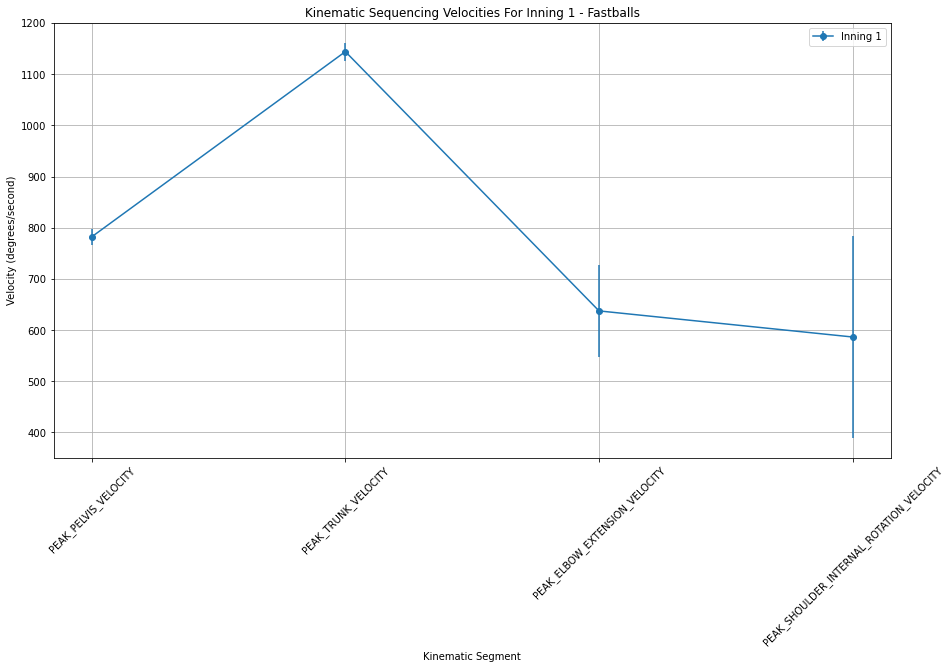

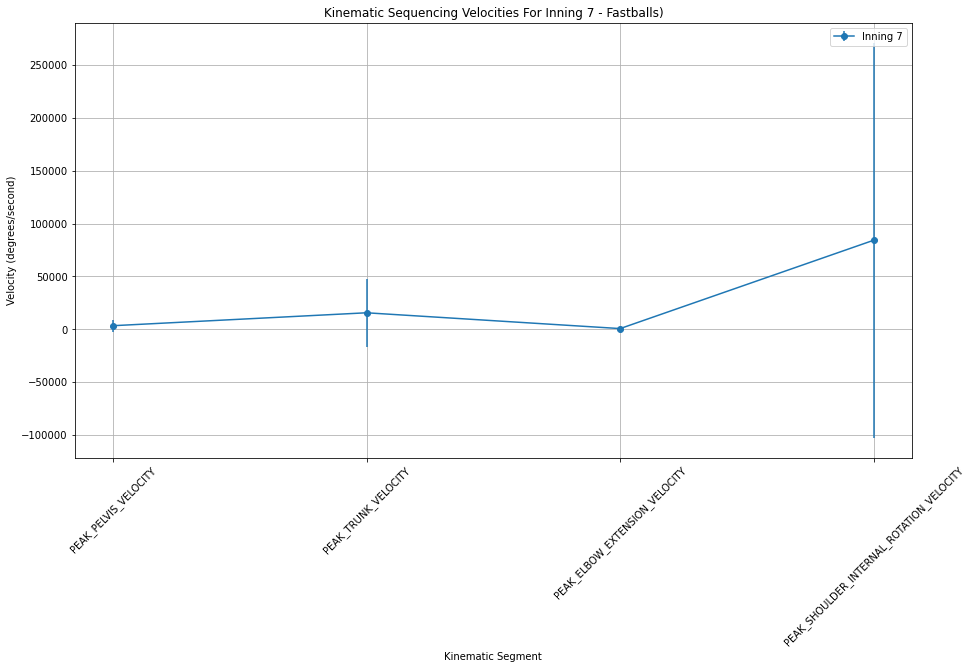

In [32]:
# I need to first get the fastballs in each of the Inning 1 and Inning 7
Fastballs_Inning_1 = df_filtered[(df_metrics['INNING'] == 1) & (df_metrics['PITCH_TYPE'] == 'Fastball')]
Fastballs_Inning_7 = df_filtered[(df_metrics['INNING'] == 7) & (df_metrics['PITCH_TYPE'] == 'Fastball')]

# then proceeded with caculating the mean and std for the kinematic sequencing velocities for each of the inning
Mean_Inning_1 = Fastballs_Inning_1.mean()
Std_Inning_1 = Fastballs_Inning_1.std()
Mean_Inning_7 = Fastballs_Inning_7.mean()
Std_Inning_7 = Fastballs_Inning_7.std()

#  I then created the labelleing for the kinematic segments to make it easy
KinematicSegments = ['PEAK_PELVIS_VELOCITY', 'PEAK_TRUNK_VELOCITY', 'PEAK_ELBOW_EXTENSION_VELOCITY', 'PEAK_SHOULDER_INTERNAL_ROTATION_VELOCITY']

#Performing the normilization by normalizing the time which start from peak leg lift to follow-through
normalized_time = np.linspace(0, 1, len(KinematicSegments))

#  plotting Inning 1 
plt.figure(figsize=(15, 8))
plt.errorbar(normalized_time, Mean_Inning_1[KinematicSegments], yerr=Std_Inning_1[KinematicSegments], label='Inning 1', fmt='-o')
plt.xticks(normalized_time, KinematicSegments, rotation=45)
plt.title('Kinematic Sequencing Velocities For Inning 1 - Fastballs')
plt.ylabel('Velocity (degrees/second)')
plt.xlabel('Kinematic Segment')
plt.grid(True)
plt.legend()
plt.savefig('Inning_1_Fastballs_Kinematic_Velocities.png')

# Ploting for Inning 7
plt.figure(figsize=(15, 8))
plt.errorbar(normalized_time, Mean_Inning_7[KinematicSegments], yerr=Std_Inning_7[KinematicSegments], label='Inning 7', fmt='-o')
plt.xticks(normalized_time, KinematicSegments, rotation=45)
plt.title('Kinematic Sequencing Velocities For Inning 7 - Fastballs)')
plt.ylabel('Velocity (degrees/second)')
plt.xlabel('Kinematic Segment')
plt.grid(True)
plt.legend()
plt.savefig('Inning_7_Fastballs_Kinematic_Velocities.png')
plt.show()


In [33]:
# Checking the range of values for the kinematic segments because of the varibilities
print(Fastballs_Inning_1[['PEAK_ELBOW_EXTENSION_VELOCITY', 'PEAK_SHOULDER_INTERNAL_ROTATION_VELOCITY']].describe())
print(Fastballs_Inning_7[['PEAK_TRUNK_VELOCITY', 'PEAK_SHOULDER_INTERNAL_ROTATION_VELOCITY']].describe())


       PEAK_ELBOW_EXTENSION_VELOCITY  PEAK_SHOULDER_INTERNAL_ROTATION_VELOCITY
count                       7.000000                                  7.000000
mean                      637.464898                                586.463681
std                        89.286381                                197.087340
min                       499.748999                                382.794890
25%                       594.725882                                468.516151
50%                       628.200421                                519.635847
75%                       692.132221                                674.066394
max                       760.588661                                917.649941
       PEAK_TRUNK_VELOCITY  PEAK_SHOULDER_INTERNAL_ROTATION_VELOCITY
count             5.000000                                  5.000000
mean          15542.421335                              84222.481642
std           32248.647258                             187033.476710
min          

In [34]:
print(Fastballs_Inning_1.shape[0])  # Number of fastballs in Inning 1
print(Fastballs_Inning_7.shape[0])  # Number of fastballs in Inning 7


7
5


In [35]:
median_inning_1 = Fastballs_Inning_1[KinematicSegments].median()
median_inning_7 = Fastballs_Inning_7[KinematicSegments].median()

In [36]:
median_inning_7

PEAK_PELVIS_VELOCITY                         805.388923
PEAK_TRUNK_VELOCITY                         1134.678888
PEAK_ELBOW_EXTENSION_VELOCITY                693.834623
PEAK_SHOULDER_INTERNAL_ROTATION_VELOCITY     630.408167
dtype: float64

In [37]:
median_inning_1

PEAK_PELVIS_VELOCITY                         782.640008
PEAK_TRUNK_VELOCITY                         1138.791777
PEAK_ELBOW_EXTENSION_VELOCITY                628.200421
PEAK_SHOULDER_INTERNAL_ROTATION_VELOCITY     519.635847
dtype: float64